## Part 1 磨刀事半 砍柴倍功

### 1. 建立baseline，初探建模效果

In [38]:
# 导入模块
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# 绘图设置
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
rcParams['font.family'] = 'SimHei'


In [39]:
# 加载数据
train = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../data/house-prices-advanced-regression-techniques/test.csv")

In [40]:
# 特征重命名
map_={ #转化成汉语方便理解
    
    "SalePrice": "销售价格（美元）",
    "MSSubClass": "建筑类",
    "MSZoning": "一般区划分类",
    "LotFrontage": "与物业相连的街道长度（英尺）",
    "LotArea": "土地面积（平方英尺）",
    "Street": "道路类型",
    "Alley": "胡同类型",
    "LotShape": "物业的一般形状",
    "LandContour": "地块平整度",
    "Utilities": "可用的公用事业类型",
    "LotConfig": "地块配置",
    "LandSlope": "物业坡度",
    "Neighborhood": "艾姆斯市限内的具体位置",
    "Condition1": "主要道路或铁路的接近程度",
    "Condition2": "主要道路或铁路的接近程度（如果存在第二个）",
    "BldgType": "住宅类型",
    "HouseStyle": "住宅风格",
    "OverallQual": "整体材料和装饰质量",
    "OverallCond": "整体条件评级",
    "YearBuilt": "原始建造日期",
    "YearRemodAdd": "翻新日期",
    "RoofStyle": "屋顶类型",
    "RoofMatl": "屋顶材料",
    "Exterior1st": "房屋外覆盖物",
    "Exterior2nd": "房屋外覆盖物（如果有多种材料）",
    "MasVnrType": "石木饰面类型",
    "MasVnrArea": "石木饰面面积（平方英尺）",
    "ExterQual": "外部材料质量",
    "ExterCond": "外部材料现状",
    "Foundation": "地基类型",
    "BsmtQual": "地下室高度",
    "BsmtCond": "地下室一般状况",
    "BsmtExposure": "地下室是否带有花园级或露台级墙壁",
    "BsmtFinType1": "地下室完工区域质量",
    "BsmtFinSF1": "类型1完成平方英尺",
    "BsmtFinType2": "第二个完工区域质量（如果存在）",
    "BsmtFinSF2": "类型2完成平方英尺",
    "BsmtUnfSF": "地下室未完成平方英尺",
    "TotalBsmtSF": "地下室总面积（平方英尺）",
    "Heating": "供暖类型",
    "HeatingQC": "供暖质量和条件",
    "CentralAir": "中央空调",
    "Electrical": "电气系统",
    "1stFlrSF": "一楼面积（平方英尺）",
    "2ndFlrSF": "二楼面积（平方英尺）",
    "LowQualFinSF": "低质量完成面积（所有楼层）",
    "GrLivArea": "地面以上居住面积（平方英尺）",
    "BsmtFullBath": "地下室全浴室",
    "BsmtHalfBath": "地下室半浴室",
    "FullBath": "地面以上全浴室",
    "HalfBath": "地面以上半浴室",
    "Bedroom": "地下室以上卧室数量",
    "Kitchen": "厨房数量",
    "KitchenQual": "厨房质量",
    "TotRmsAbvGrd": "地面以上总房间数（不包括浴室）",
    "Functional": "家庭功能评级",
    "Fireplaces": "壁炉数量",
    "FireplaceQu": "壁炉质量",
    "GarageType": "车库位置",
    "GarageYrBlt": "车库建造年份",
    "GarageFinish": "车库内部完工",
    "GarageCars": "车库容纳车辆数",
    "GarageArea": "车库面积（平方英尺）",
    "GarageQual": "车库质量",
    "GarageCond": "车库条件",
    "PavedDrive": "铺设车道",
    "WoodDeckSF": "木甲板面积（平方英尺）",
    "OpenPorchSF": "开放门廊面积（平方英尺）",
    "EnclosedPorch": "封闭门廊面积（平方英尺）",
    "3SsnPorch": "三季门廊面积（平方英尺）",
    "ScreenPorch": "屏风门廊面积（平方英尺）",
    "PoolArea": "泳池面积（平方英尺）",
    "PoolQC": "泳池质量",
    "Fence": "围栏质量",
    "MiscFeature": "其他类别中未涵盖的其他功能",
    "MiscVal": "其他功能的价值",
    "MoSold": "销售月份",
    "YrSold": "销售年份",
    "SaleType": "销售类型",
    "SaleCondition": "销售条件"
}
train.rename(columns=map_, inplace=True)
test.rename(columns=map_,inplace=True)

In [41]:
# 数据概览
train.describe()
train.info() # train中有销售价格，但是test中没有

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1460 non-null   int64  
 1   建筑类                    1460 non-null   int64  
 2   一般区划分类                 1460 non-null   object 
 3   与物业相连的街道长度（英尺）         1201 non-null   float64
 4   土地面积（平方英尺）             1460 non-null   int64  
 5   道路类型                   1460 non-null   object 
 6   胡同类型                   91 non-null     object 
 7   物业的一般形状                1460 non-null   object 
 8   地块平整度                  1460 non-null   object 
 9   可用的公用事业类型              1460 non-null   object 
 10  地块配置                   1460 non-null   object 
 11  物业坡度                   1460 non-null   object 
 12  艾姆斯市限内的具体位置            1460 non-null   object 
 13  主要道路或铁路的接近程度           1460 non-null   object 
 14  主要道路或铁路的接近程度（如果存在第二个）  1460 non-null   object 
 15  住宅类型

In [42]:
# 数据基本处理
all_data=pd.concat((train,test))

# onehot编码
all_data=pd.get_dummies(all_data)

# 填充缺失值
all_data=all_data.fillna(all_data.mean())

# 数据切分
X_train=all_data[:train.shape[0]]
X_test=all_data[train.shape[0]:]
y=train[map_["SalePrice"]]
X_train=X_train.loc[:,~X_train.columns.isin([map_["SalePrice"]])]
X_train

,Id,建筑类,与物业相连的街道长度（英尺）,土地面积（平方英尺）,整体材料和装饰质量,整体条件评级,原始建造日期,翻新日期,石木饰面面积（平方英尺）,类型1完成平方英尺,...,销售类型_ConLw,销售类型_New,销售类型_Oth,销售类型_WD,销售条件_Abnorml,销售条件_AdjLand,销售条件_Alloca,销售条件_Family,销售条件_Normal,销售条件_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,False,False,False,True,False,False,False,False,True,False


In [43]:
# K 折交叉验证
from sklearn.model_selection import KFold
folds = KFold(n_splits= 5, shuffle=True, random_state=2024)

# 模型参数
params = {'num_leaves': 63, 'min_child_samples': 50, 'objective': 'regression',
'learning_rate': 0.01, 'boosting_type': 'gbdt', 'metric': 'rmse'}

# 建立baseline
from lightgbm import log_evaluation, early_stopping
callbacks = [log_evaluation(period=100), early_stopping(stopping_rounds=100)]

for trn_idx, val_idx in folds.split(X_train, y):
    trn_df, trn_label = X_train.iloc[trn_idx, :], y[trn_idx]
    val_df, val_label = X_train.iloc[val_idx, :], y[val_idx]
    dtrn = lgb.Dataset(trn_df, label = trn_label)
    dval = lgb.Dataset(val_df, label = val_label)
    bst = lgb.train(params,dtrn, num_boost_round=1000,valid_sets=[dtrn, dval],
    callbacks=callbacks)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3323
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 129
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 180194.401541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [44]:
# scikit-learn接口的baseline
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits= 5, shuffle=True, random_state=2024)
cv_score = cross_val_score(LGBMRegressor(),
                           X=X_train, y=y, 
                           cv=folds, 
                           scoring='neg_root_mean_squared_error')
cv_score.mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3431
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 179
[LightGBM] [Info] Start training from score 180194.401541
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3441
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 184
[LightGBM] [Info] Start training from score 181744.366438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

np.float64(-28678.019124499166)

### 2. 数据探索，探索数据基本情况

In [45]:
# 缺失值和重复值分析
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(),
    train[col].isnull().sum() * 100 / train.shape[0],
    train[col].value_counts(normalize=True,
    dropna=False).values[0] * 100, train[col].dtype))
stats_df = pd.DataFrame(stats, columns=['特征', '类别数',
    '缺失百分比',
    '最大类占比', 'type'])
stats_df.sort_values('缺失百分比', ascending=False)[:10]

,特征,类别数,缺失百分比,最大类占比,type
72,泳池质量,3,99.520548,99.520548,object
74,其他类别中未涵盖的其他功能,4,96.301370,96.301370,object
6,胡同类型,2,93.767123,93.767123,object
73,围栏质量,4,80.753425,80.753425,object
25,石木饰面类型,3,59.726027,59.726027,object
57,壁炉质量,5,47.260274,47.260274,object
3,与物业相连的街道长度（英尺）,110,17.739726,17.739726,float64
63,车库质量,5,5.547945,89.794521,object
60,车库内部完工,3,5.547945,41.438356,object
58,车库位置,6,5.547945,59.589041,object


<Axes: >

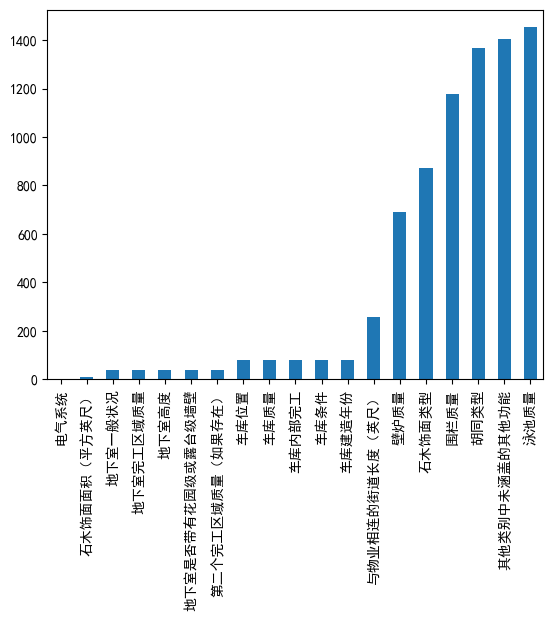

In [46]:
# 缺失值画图

missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [47]:
# 单变量分析
# 首先分析标签
train[map_["SalePrice"]].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: 销售价格（美元）, dtype: float64

C:\Users\yx140\AppData\Local\Temp\ipykernel_17784\531726147.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[map_['SalePrice']], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='销售价格（美元）', ylabel='Density'>

d:\PROGRAMDATA\MINICONDA3\ENVS\ML\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  func(*args, **kwargs)
d:\PROGRAMDATA\MINICONDA3\ENVS\ML\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


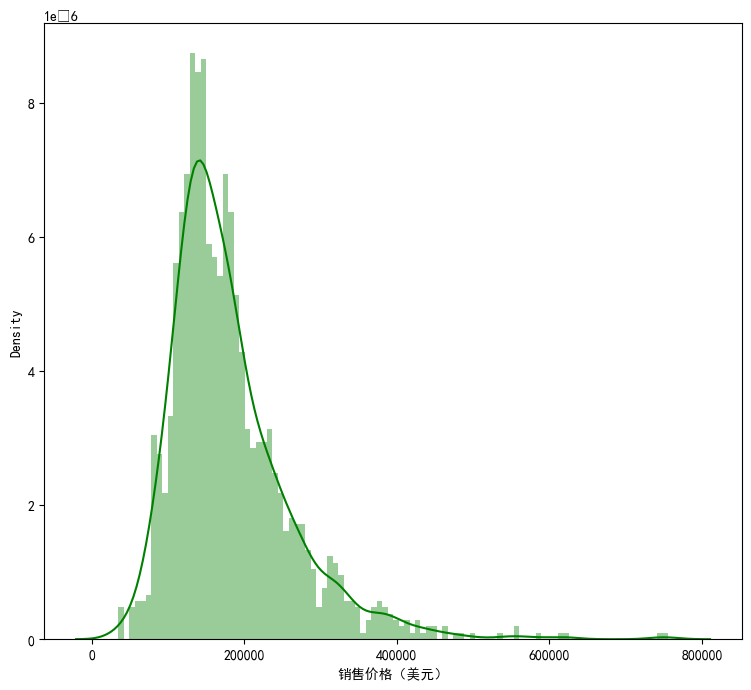

In [48]:
# 标签分析画图
plt.figure(figsize=(9,8))
sns.distplot(train[map_['SalePrice']], color='g', bins=100, hist_kws={'alpha': 0.4})


C:\Users\yx140\AppData\Local\Temp\ipykernel_17784\4233633425.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train[map_['SalePrice']]), color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='销售价格（美元）', ylabel='Density'>

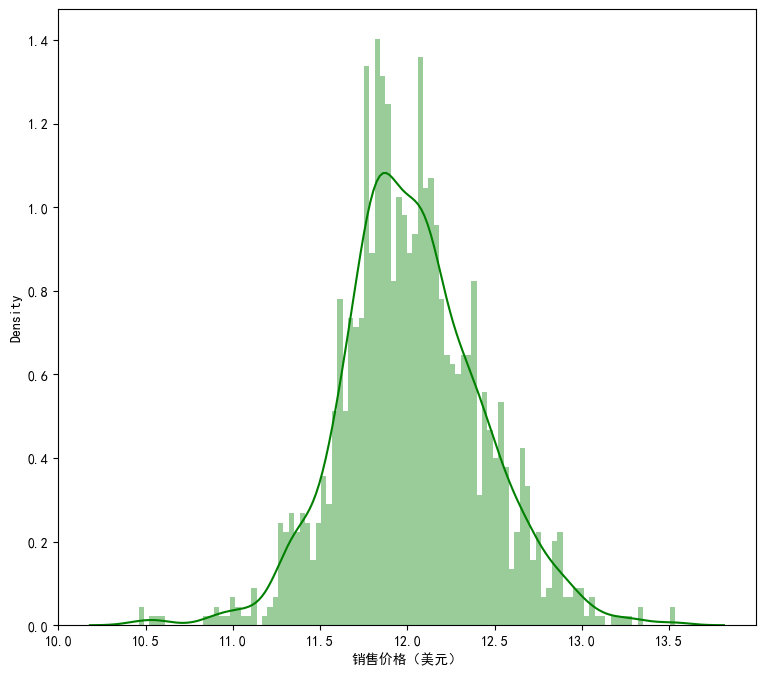

In [49]:
# 由图可见，房屋的销售价格呈偏离正态分布，属于向右倾斜类型，存在峰值状态，有偏度和峰度，需要进行对数转换
plt.figure(figsize=(9,8))
sns.distplot(np.log(train[map_['SalePrice']]), color='g', bins=100, hist_kws={'alpha': 0.4})

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': '建筑类'}>,
        <Axes: title={'center': '与物业相连的街道长度（英尺）'}>,
        <Axes: title={'center': '土地面积（平方英尺）'}>,
        <Axes: title={'center': '整体材料和装饰质量'}>,
        <Axes: title={'center': '整体条件评级'}>],
       [<Axes: title={'center': '原始建造日期'}>,
        <Axes: title={'center': '翻新日期'}>,
        <Axes: title={'center': '石木饰面面积（平方英尺）'}>,
        <Axes: title={'center': '类型1完成平方英尺'}>,
        <Axes: title={'center': '类型2完成平方英尺'}>,
        <Axes: title={'center': '地下室未完成平方英尺'}>],
       [<Axes: title={'center': '地下室总面积（平方英尺）'}>,
        <Axes: title={'center': '一楼面积（平方英尺）'}>,
        <Axes: title={'center': '二楼面积（平方英尺）'}>,
        <Axes: title={'center': '低质量完成面积（所有楼层）'}>,
        <Axes: title={'center': '地面以上居住面积（平方英尺）'}>,
        <Axes: title={'center': '地下室全浴室'}>],
       [<Axes: title={'center': '地下室半浴室'}>,
        <Axes: title={'center': '地面以上全浴室'}>,
        <Axes: title={'center': '地面以上半浴室'}>,
        <Axes: title={'cente

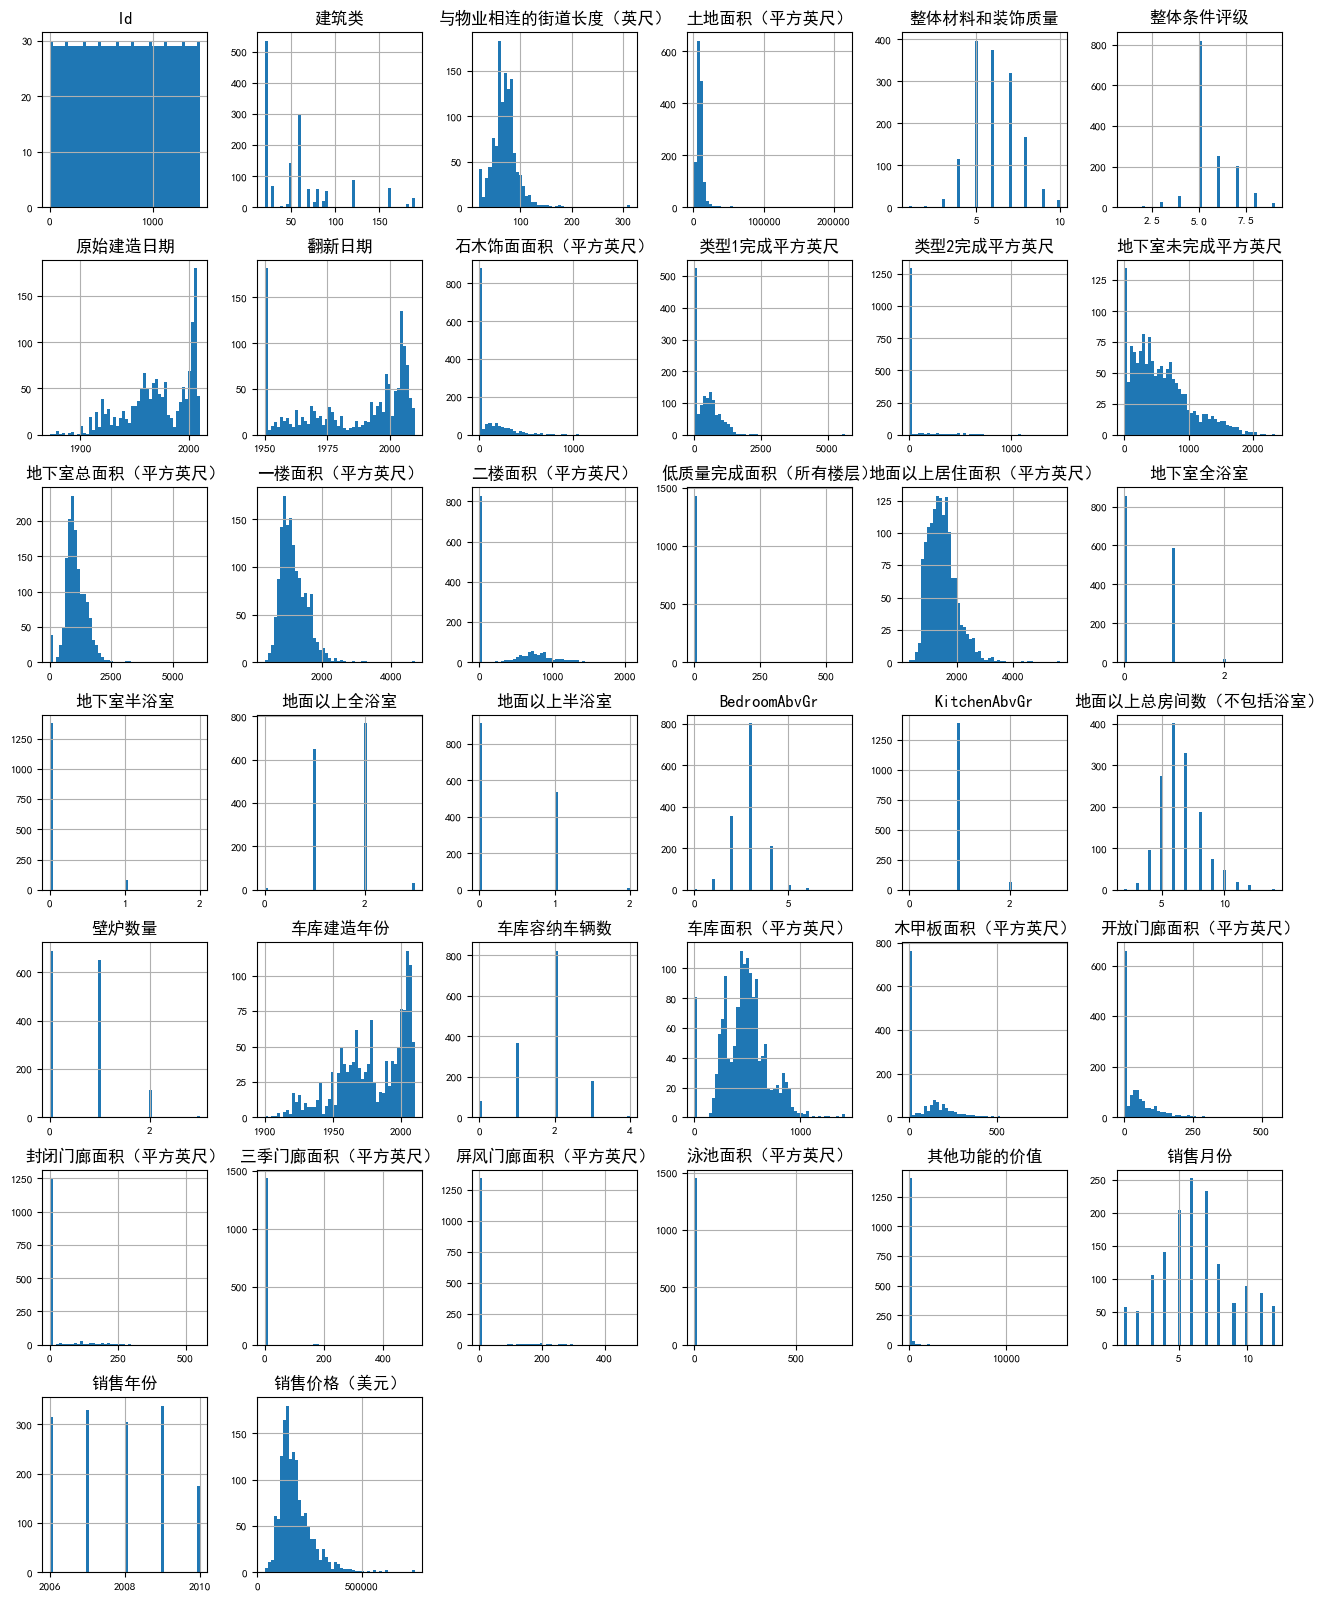

In [50]:
# 标签之后，连续性变量的基本分布探查
df_num = train.select_dtypes(include = ['float64', 'int64']) # 通过数据类型筛选
# df_num = df_num[df_num.columns.tolist()[1:5]]
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

d:\PROGRAMDATA\MINICONDA3\ENVS\ML\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.draw()


<Axes: >

d:\PROGRAMDATA\MINICONDA3\ENVS\ML\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  func(*args, **kwargs)
d:\PROGRAMDATA\MINICONDA3\ENVS\ML\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


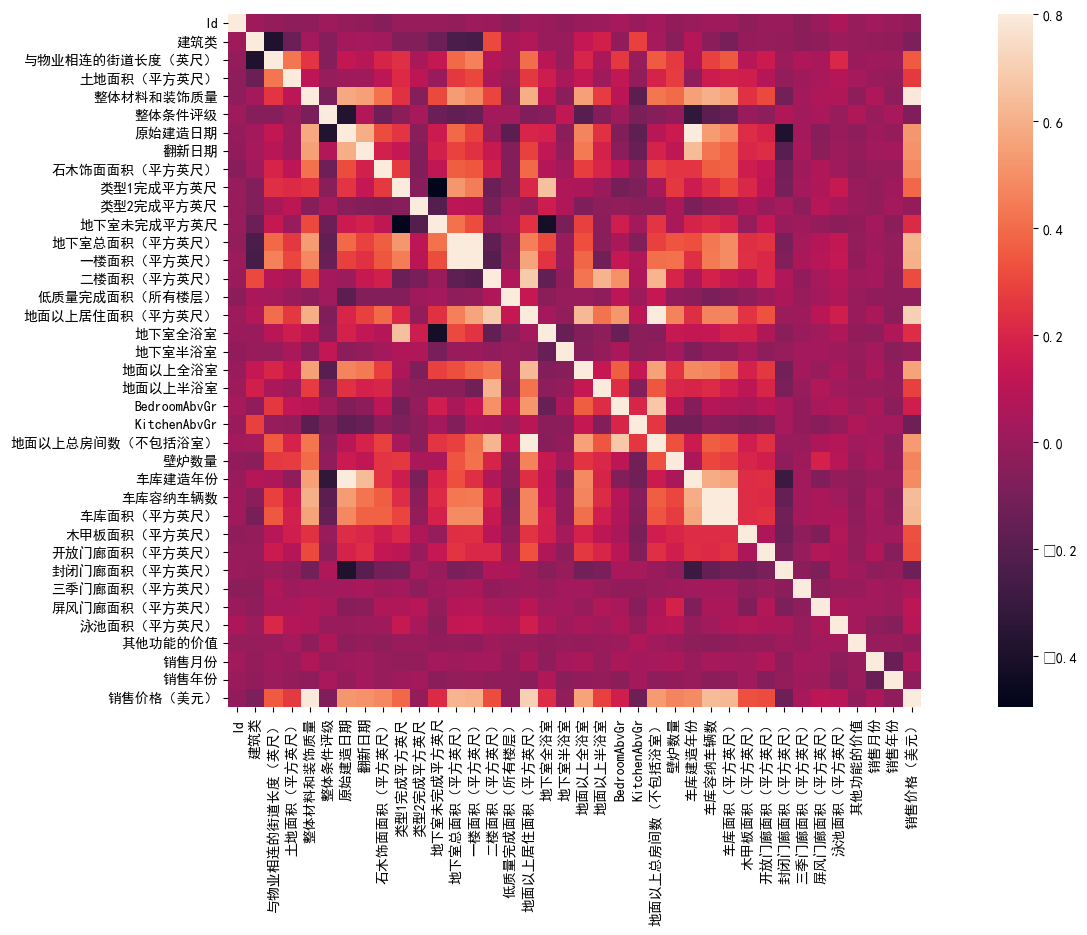

In [51]:
# 相关性分析
train_float=train.select_dtypes(["int64",'float64'])
corrmat = train_float.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

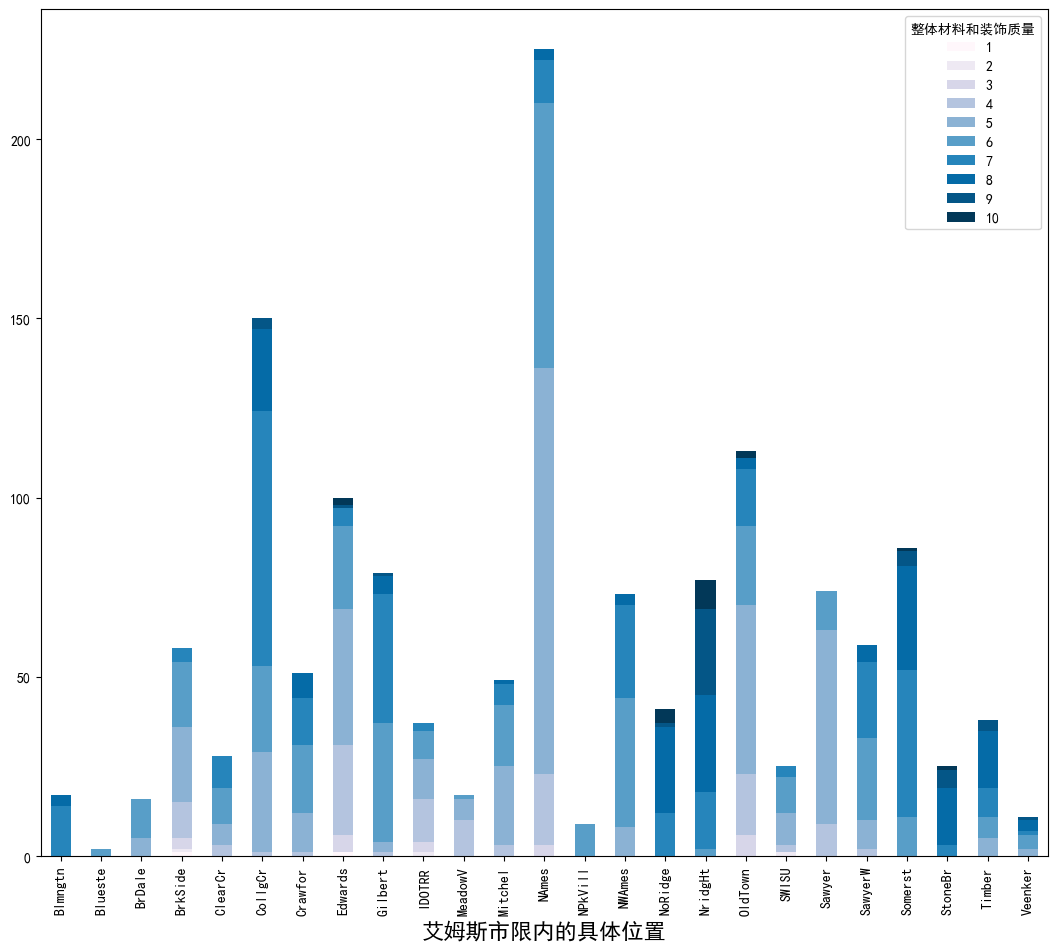

In [52]:
# 多变量分析
# plt.style.use('seaborn-white')
type_cluster=train.groupby([map_['Neighborhood'],map_['OverallQual']]).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),
grid=False)
plt.xlabel(map_['Neighborhood'], fontsize=16)
plt.show()

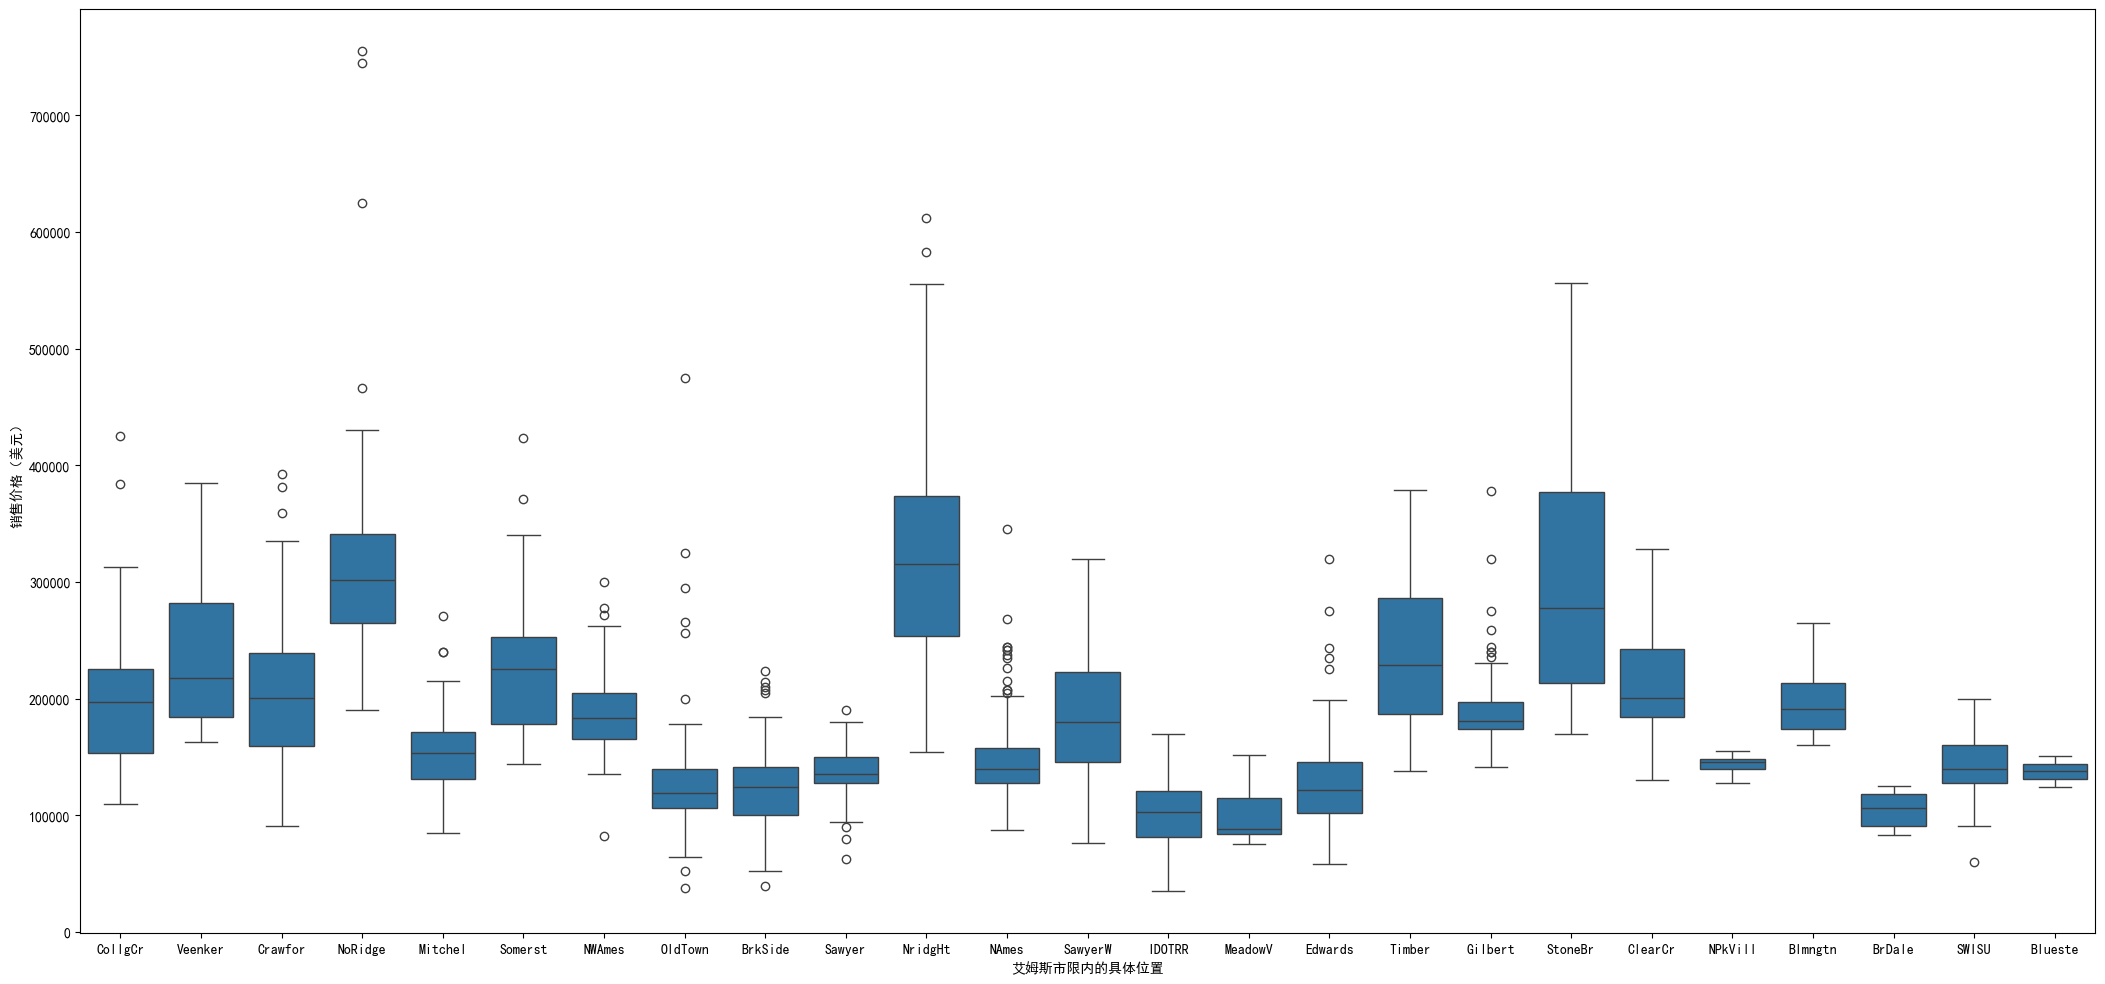

In [53]:
# 分析不同位置的房屋价格
# var = map_['Neighborhood']
# # data = pd.concat([train[map_['SalePrice']], train[var]], axis=1)
# f, ax = plt.subplots(figsize=(26, 12))
# fig = sns.boxplot(x=var, y=map_["SalePrice"],data=train)
# fig.axis(ymin=0, ymax=15)
# plt.show()
fig,ax=plt.subplots(figsize=(26,12))
fig=sns.boxplot(x=map_['Neighborhood'], y=map_['SalePrice'], data=train)
plt.show()

In [54]:
# 从上可以发现，NoRidge、NridgHt、StoneBr这三个地方的整体材料和装修质量比较高，对应的售价也比较高
# 既然房屋位置和房屋评价高的地方，房价更高，那么可以通过这两项构造新的特征

### 3. 模型分析

In [55]:
# 拆分X,y
from sklearn.preprocessing import Normalizer,StandardScaler
X=train.loc[:,train.columns!=map_["SalePrice"]]
X=pd.get_dummies(X)
X=X.fillna(X.mean())
feature_names=X.columns

# 假设您已经定义了 X, y
X=Normalizer().fit_transform(X)

y=train[map_["SalePrice"]]


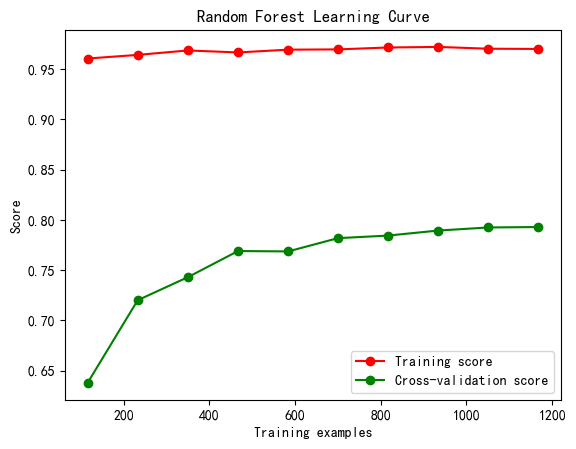

In [56]:
# 绘制训练集学习曲线

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

# 定义随机森林回归器
rf = RandomForestRegressor(random_state=2024)

# 使用 learning_curve 函数构建学习曲线
train_sizes, train_scores, test_scores = learning_curve(estimator=rf,
                                                        X=X,
                                                        y=y,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        random_state=2024)

# 计算每个训练集大小的平均训练和测试得分
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# 绘制学习曲线
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Random Forest Learning Curve")
plt.legend(loc="best")
plt.show()

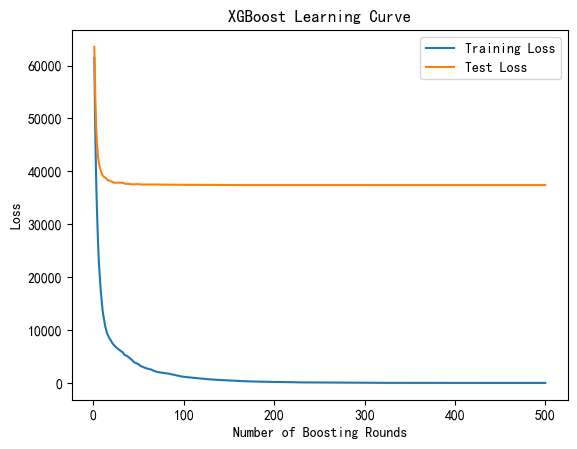

In [57]:
# 绘制迭代次数与loss值的学习曲线
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)

# 初始化XGBoost回归器
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=500)

# 训练模型并收集损失值
xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],   verbose=False)

# 提取训练和测试损失值
train_loss = xgb_reg.evals_result()['validation_0']['rmse']
test_loss = xgb_reg.evals_result()['validation_1']['rmse']

# 绘制学习曲线
plt.figure()
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Loss')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.show()

In [58]:
# 由上图可发现，模型在数据集上呈现过拟合特征，即训练集表现好，测试集表现差，
# 过拟合有以下几个原因
# 模型复杂度过高，参数过多：选用简单模型
# 训练数据比较小：增加训练集数据
# 训练集和测试集分布不一致：特征工程，选择，变换


d:\PROGRAMDATA\MINICONDA3\ENVS\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+12, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
d:\PROGRAMDATA\MINICONDA3\ENVS\ML\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


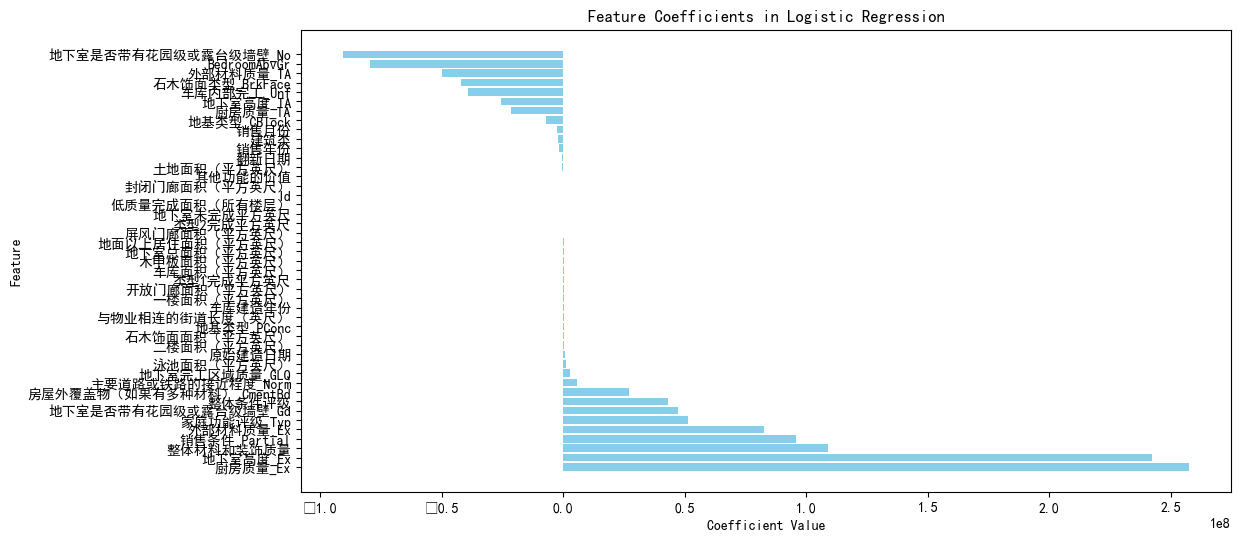

In [59]:
# 特征重要性分析
# 对于树模型，计算特征的信息增益或分裂次数得到的特征的重要性得分。对于LR和SVM，使用特征系数作为特征的重要性得分。
# Lasso模型分析
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# 假设您已经定义了 X, y

# 初始化Lasso模型
lasso = Lasso(alpha=0.1)  # 设置正则化参数alpha

# 拟合模型
lasso.fit(X, y)

# 获取特征重要性
feature_importance = lasso.coef_

coef_dict=dict(zip(feature_names, feature_importance))
df_coef = pd.DataFrame(list(coef_dict.items()), columns=['Feature', 'Coefficient'])
df_coef = df_coef.sort_values(by='Coefficient', ascending=False)
df_coef=df_coef[df_coef["Coefficient"]!=0]

# 打印输出DataFrame
plt.figure(figsize=(12, 6))
plt.barh(df_coef['Feature'], df_coef['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients in Logistic Regression')
plt.show()

Mean Squared Error: 1373809374.8699143
R^2 Score: 0.7716877392206227


d:\PROGRAMDATA\MINICONDA3\ENVS\ML\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


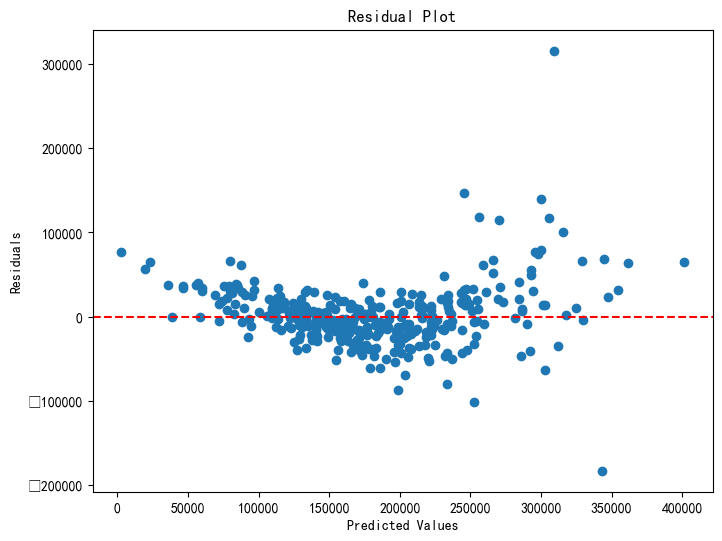

In [60]:
# 误差分析
# 预测
from sklearn.metrics import r2_score
y_pred = lasso.predict(X_test)

# 模型性能评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# 绘制残差图
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

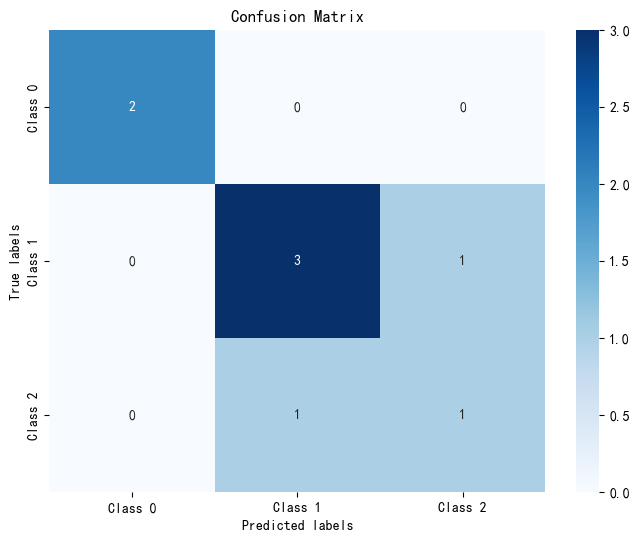

In [61]:
# 混淆矩阵
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 生成一个样本混淆矩阵
# 这里只是一个示例，您应该用您的实际模型输出结果替换这里的预测值和真实标签
y_true = np.array([1, 0, 1, 2, 1, 0, 2, 1])
y_pred = np.array([1, 0, 2, 2, 1, 0, 1, 1])

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵图像
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 4. 特征工程

In [62]:
# 数据读取
import pandas as pd
train = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../data/house-prices-advanced-regression-techniques/test.csv")

ntrain=train.shape[0]
ntest=test.shape[0]

map_={ #转化成汉语方便理解
    
    "SalePrice": "销售价格（美元）",
    "MSSubClass": "建筑类",
    "MSZoning": "一般区划分类",
    "LotFrontage": "与物业相连的街道长度（英尺）",
    "LotArea": "土地面积（平方英尺）",
    "Street": "道路类型",
    "Alley": "胡同类型",
    "LotShape": "物业的一般形状",
    "LandContour": "地块平整度",
    "Utilities": "可用的公用事业类型",
    "LotConfig": "地块配置",
    "LandSlope": "物业坡度",
    "Neighborhood": "艾姆斯市限内的具体位置",
    "Condition1": "主要道路或铁路的接近程度",
    "Condition2": "主要道路或铁路的接近程度（如果存在第二个）",
    "BldgType": "住宅类型",
    "HouseStyle": "住宅风格",
    "OverallQual": "整体材料和装饰质量",
    "OverallCond": "整体条件评级",
    "YearBuilt": "原始建造日期",
    "YearRemodAdd": "翻新日期",
    "RoofStyle": "屋顶类型",
    "RoofMatl": "屋顶材料",
    "Exterior1st": "房屋外覆盖物",
    "Exterior2nd": "房屋外覆盖物（如果有多种材料）",
    "MasVnrType": "石木饰面类型",
    "MasVnrArea": "石木饰面面积（平方英尺）",
    "ExterQual": "外部材料质量",
    "ExterCond": "外部材料现状",
    "Foundation": "地基类型",
    "BsmtQual": "地下室高度",
    "BsmtCond": "地下室一般状况",
    "BsmtExposure": "地下室是否带有花园级或露台级墙壁",
    "BsmtFinType1": "地下室完工区域质量",
    "BsmtFinSF1": "类型1完成平方英尺",
    "BsmtFinType2": "第二个完工区域质量（如果存在）",
    "BsmtFinSF2": "类型2完成平方英尺",
    "BsmtUnfSF": "地下室未完成平方英尺",
    "TotalBsmtSF": "地下室总面积（平方英尺）",
    "Heating": "供暖类型",
    "HeatingQC": "供暖质量和条件",
    "CentralAir": "中央空调",
    "Electrical": "电气系统",
    "1stFlrSF": "一楼面积（平方英尺）",
    "2ndFlrSF": "二楼面积（平方英尺）",
    "LowQualFinSF": "低质量完成面积（所有楼层）",
    "GrLivArea": "地面以上居住面积（平方英尺）",
    "BsmtFullBath": "地下室全浴室",
    "BsmtHalfBath": "地下室半浴室",
    "FullBath": "地面以上全浴室",
    "HalfBath": "地面以上半浴室",
    "BedroomAbvGr": "地下室以上卧室数量",
    "KitchenAbvGr": "厨房数量",
    "KitchenQual": "厨房质量",
    "TotRmsAbvGrd": "地面以上总房间数（不包括浴室）",
    "Functional": "家庭功能评级",
    "Fireplaces": "壁炉数量",
    "FireplaceQu": "壁炉质量",
    "GarageType": "车库位置",
    "GarageYrBlt": "车库建造年份",
    "GarageFinish": "车库内部完工",
    "GarageCars": "车库容纳车辆数",
    "GarageArea": "车库面积（平方英尺）",
    "GarageQual": "车库质量",
    "GarageCond": "车库条件",
    "PavedDrive": "铺设车道",
    "WoodDeckSF": "木甲板面积（平方英尺）",
    "OpenPorchSF": "开放门廊面积（平方英尺）",
    "EnclosedPorch": "封闭门廊面积（平方英尺）",
    "3SsnPorch": "三季门廊面积（平方英尺）",
    "ScreenPorch": "屏风门廊面积（平方英尺）",
    "PoolArea": "泳池面积（平方英尺）",
    "PoolQC": "泳池质量",
    "Fence": "围栏质量",
    "MiscFeature": "其他类别中未涵盖的其他功能",
    "MiscVal": "其他功能的价值",
    "MoSold": "销售月份",
    "YrSold": "销售年份",
    "SaleType": "销售类型",
    "SaleCondition": "销售条件"
}
train.rename(columns=map_, inplace=True)
test.rename(columns=map_,inplace=True)

data=pd.concat([train,test],axis=0,sort=False)

In [63]:
# 删除缺失值大于50%的特征列
missing_cols = [c for c in data if data[c].isna().mean()*100 >50] # isna()：当前列值为空则=True（1），否则为False（0）
data=data.drop(missing_cols,axis=1)

In [64]:
# 对object型缺失特征进行填充
object_df = data.select_dtypes(include=["object"])
numberical_df = data.select_dtypes(exclude=["object"])

object_df = object_df.fillna('unknown')

In [65]:
# 对数值型特征用中位数填充
missing_cols = [c for c in numberical_df if numberical_df[c].isna().sum()>0]
for c in missing_cols:
    numberical_df[c]=numberical_df[c].fillna(numberical_df[c].median())


In [66]:
# 删除特征中分布极其不均衡的
stats=[]
for col in object_df.columns:
    stats.append((col,object_df[col].value_counts().values[0]/object_df.shape[0]*100))
stats_df = pd.DataFrame(stats,columns=["特征","最大占比"])

missing_cols = [c for c in object_df if object_df[c].value_counts().values[0]/object_df.shape[0]*100 >95]
object_df=object_df.drop(missing_cols,axis=1)

In [67]:
# 基本特征构造

# 给销售日期小于建造日期的数据，将其销售日期改为销售日期的最大年份
numberical_df.loc[numberical_df[map_["YrSold"]]<numberical_df[map_["YearBuilt"]],map_["YrSold"]]=2009

In [68]:
# 对浴池和半浴池求和，对全浴和半浴求和，对一楼面积和二楼面积以及地下室面积求和

numberical_df['全Bsmt面积'] = numberical_df[map_['BsmtFullBath']] + numberical_df[map_['BsmtHalfBath']]*0.5 
numberical_df['全Bath'] = numberical_df[map_['FullBath']] + numberical_df[map_['HalfBath']]*0.5 
numberical_df['楼室总面积'] = numberical_df[map_['TotalBsmtSF']] + numberical_df[map_['1stFlrSF']] + numberical_df[map_['2ndFlrSF']]

In [69]:
# 特征编码
bin_map = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0, 'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1, 'IR3':0,"None" : 0,"No" : 2, "Mn" : 2,
"Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6}

object_df[map_['ExterQual']] = object_df[map_['ExterQual']].map(bin_map) 
object_df[map_['ExterCond']]= object_df[map_['ExterCond']].map(bin_map) 
object_df[map_['BsmtCond']] = object_df[map_['BsmtCond']].map(bin_map) 
object_df[map_['BsmtQual']] = object_df[map_['BsmtQual']].map(bin_map) 
object_df[map_['HeatingQC']] = object_df[map_['HeatingQC']].map(bin_map) 
object_df[map_['KitchenQual']] = object_df[map_['KitchenQual']].map(bin_map) 
object_df[map_['FireplaceQu']] = object_df[map_['FireplaceQu']].map(bin_map) 
object_df[map_['GarageQual']] = object_df[map_['GarageQual']].map(bin_map) 
object_df[map_['GarageCond']] = object_df[map_['GarageCond']].map(bin_map) 
object_df[map_['CentralAir']] = object_df[map_['CentralAir']].map(bin_map) 
object_df[map_['LotShape']] = object_df[map_['LotShape']].map(bin_map) 
object_df[map_['BsmtExposure']] = object_df[map_['BsmtExposure']].map(bin_map) 
object_df[map_['BsmtFinType1']] = object_df[map_['BsmtFinType1']].map(bin_map) 
object_df[map_['BsmtFinType2']] = object_df[map_['BsmtFinType2']].map(bin_map)

In [70]:
PavedDrive = {"N" : 0, "P" : 1, "Y" : 2} 
object_df[map_['PavedDrive']] = object_df[map_['PavedDrive']].map(PavedDrive) 

# 选择剩余的object 特征 
rest_object_columns = object_df.select_dtypes(include = ['object']) 

# 进行one-hot 编码 
object_df = pd.get_dummies(object_df, columns = rest_object_columns.columns) 
data = pd.concat([object_df, numberical_df], axis=1, sort=False)

In [71]:
data

,物业的一般形状,外部材料质量,外部材料现状,地下室高度,地下室一般状况,地下室是否带有花园级或露台级墙壁,地下室完工区域质量,第二个完工区域质量（如果存在）,供暖质量和条件,中央空调,...,三季门廊面积（平方英尺）,屏风门廊面积（平方英尺）,泳池面积（平方英尺）,其他功能的价值,销售月份,销售年份,销售价格（美元）,全Bsmt面积,全Bath,楼室总面积
0,3,4,2,4.0,2.0,2.0,6.0,1.0,4,1,...,0,0,0,0,2,2008,208500.0,1.0,2.5,2566.0
1,3,2,2,4.0,2.0,4.0,5.0,1.0,4,1,...,0,0,0,0,5,2007,181500.0,0.5,2.0,2524.0
2,2,4,2,4.0,2.0,2.0,6.0,1.0,4,1,...,0,0,0,0,9,2008,223500.0,1.0,2.5,2706.0
3,2,2,2,2.0,4.0,2.0,5.0,1.0,4,1,...,0,0,0,0,2,2006,140000.0,1.0,1.0,2473.0
4,2,4,2,4.0,2.0,3.0,6.0,1.0,4,1,...,0,0,0,0,12,2008,250000.0,1.0,2.5,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,2,2,2.0,2.0,2.0,1.0,1.0,4,1,...,0,0,0,0,6,2006,163000.0,0.0,1.5,1638.0
1455,3,2,2,2.0,2.0,2.0,3.0,1.0,2,1,...,0,0,0,0,4,2006,163000.0,0.0,1.5,1638.0
1456,3,2,2,2.0,2.0,2.0,5.0,1.0,4,1,...,0,0,0,0,9,2006,163000.0,1.0,1.0,2448.0
1457,3,2,2,4.0,2.0,3.0,6.0,1.0,2,1,...,0,0,0,700,7,2006,163000.0,0.5,1.0,1882.0


In [72]:
# 特征选择 过滤掉相似性大于0.9的特征
def correlation(data,threshold):
    col_corr=set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # 相似性分数与阈值对比 
                colname = corr_matrix.columns[i] # 获取列名 
                col_corr.add(colname)
    return col_corr

all_cols = [c for c in data.columns if c not in [map_['SalePrice']]] 
corr_features = correlation(data[all_cols], 0.9)

In [73]:
corr_features

{'全Bath',
 '全Bsmt面积',
 '屋顶类型_Hip',
 '房屋外覆盖物（如果有多种材料）_CmentBd',
 '房屋外覆盖物（如果有多种材料）_MetalSd',
 '房屋外覆盖物（如果有多种材料）_VinylSd',
 '房屋外覆盖物（如果有多种材料）_unknown',
 '车库内部完工_unknown',
 '销售条件_Partial'}